# <u>TP3</u>

## par Antoine Boissinot  - -  François Gaudreault  - -  Béatrice Lessard-Hamel

## Présenté à M. Philippe Després

### Date de remise : 19 mars 2021

In [1]:
from astropy import constants as cst
import matplotlib.pylab as plt
import numpy as np
from numpy import sqrt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
#Constantes utilisés
G = cst.G.value * ( 365.25 * 24 * 60 * 60) ** 2 #m^2/kg an^2
M = cst.M_sun.value #kg
m = cst.M_earth.value #kg

## Mécanique céleste - comètes

#### a. Transformation des équations
On a les équations suivantes à résoudre: 
$$ \frac{d^2x}{dt^2} = -GM\frac{x}{r^3}, \; \; \; \; \; \frac{d^2y}{dt^2} = -GM\frac{y}{r^3}. $$ 
Pour résoudre numériquement on souhaite transformer ces équations sous la forme: 
$$\frac{d\mathbf{r}}{dt} = \mathbf{f}(\mathbf{r}, t). $$
Sachant que la vitesse est la dérivée temporel de la position, on peut réécrire ces équations comme: 
$$ \frac{dv_x}{dt} = -GM\frac{x}{r^3}, \; \; \; \; \; \frac{dv_y}{dt} = -GM\frac{y}{r^3}, \\ \frac{dx}{dt} = v_x, \; \; \; \; \; \frac{dy}{dt} = v_y. $$ 
On peut donc exprimer $\mathbf{r}$ et $\mathbf{f}$ comme:
$$\mathbf{r} = \begin{pmatrix}
x \\
y \\
v_x \\ 
v_y 
\end{pmatrix}, \; \; \; \; \;  \mathbf{f} = \begin{pmatrix}
v_x \\
v_y \\
-GM\frac{x}{r^3}\\ 
-GM\frac{y}{r^3}
\end{pmatrix}.$$
Il ne nous reste plus qu'à solutionner numériquement!


#### b. RK4 à pas constant 

On souhaite résoudre ces équations avec une les conditions initiales $x = 4 × 10^9$ km, $y = 0$, $v_x = 0$
et $v_y = 500$ m/s. Pour ce faire la méthode Runge-Kutta d'ordre 4 va être utilisée.  

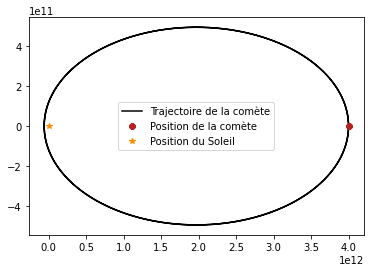

In [92]:
def f(r): #f returns the vector of the time derivatives of each coordinates 
    x = r[0]
    y = r[1]
    v_x = r[2]
    v_y = r[3]
    dist = (x**2 + y**2)**(0.5)
    return np.array([v_x, v_y, -G*M*x/dist**3, -G*M*y/dist**3], float) 

def Runge_Kutta(f, r, h):
    """ 
    The function return the vector r of the updated coordinates using the Runge-Kutta method

    param 1 f: f is a vector of function
    param 2 r: r is the vector of the current coordinates
    param 3 h: h is the step between each coordinates 
    return: dr the change of the coordinates vector 
    """
    k_1 = h*f(r)
    k_2 = h*f(r + 0.5*k_1)
    k_3 = h*f(r + 0.5*k_2)
    k_4 = h*f(r + k_3)
    dr = (k_1 + 2*k_2 + 2*k_3 + k_4)/6 
    return dr
    

def orbit_constant_step(x, y, v_x, v_y, t, h):
    """
    The function return the x and y position at time t of the orbit of a comet using the 4th order Runge-Kutta to solve Newton's law of universal
    gravitation with constant time step h.    
    
    param 1 x: x is the distance in the x plane between the sun and the comet à time t = 0 [m] 
    param 2 y: y is the distance in the y plane between the sun and the comet à time t = 0 [m] 
    param 3 v_x: v_x is the speed of the comet in the x direction at time t = 0 [m/year] 
    param 4 v_y: v_y is the speed of the comet in the y direction at time t = 0 [m/year] 
    param 5 t: t is the the time duration of the simulation [year]
    param 6 h: h is the time step between each time value 
    return: x_points, y_points and t_points, the x and y list of positions corresponding to the time of t_points   
    """ 
    t_points = np.arange(0, t, h) #The array of time values 
    x_points = [] #The list of x positions values
    y_points = [] #The list of y positions values
    r = np.array([x, y, v_x, v_y]) #The vector of all coordinates  
  
    #We use the Runge-Kutta method
    for t in t_points:
        x_points.append(r[0])
        y_points.append(r[1])   
        r += Runge_Kutta(f, r, h) 
    
    return x_points, y_points, t_points 


#Parameters 

x = 4*10**12 #[m]
y = 0 
v_x = 0
v_y = 1000*(365.2422*24*60*60) # [m/year]
t = 100 #[year]
h = 0.0008

x_points, y_points, t_points = orbit_constant_step(x, y, v_x, v_y, t, h)

#Graph

plt.plot(x_points, y_points, color = "Black", label = "Trajectoire de la comète")
plt.plot(x_points[-1], y_points[-1], color = "firebrick", label = "Position de la comète", marker='8', linestyle = 'None')
plt.plot(0, 0, color = 'darkorange', marker='*', linestyle = 'None', label = "Position du Soleil")
plt.legend()
plt.show()

#### c. RK4 à pas variable
Afin d'augmenter substantiellement la vitesse de calcul, il est possible de faire varier le pas de temps entre chaque itération. L'erreur maximale admise pour augmenter la vitesse est $\delta = 1$ km. 

167


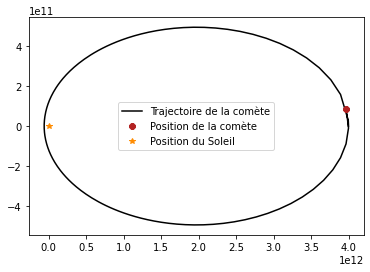

In [103]:
def orbit_variable_step(x, y, v_x, v_y, t, h, delta):
    """
    The function return the x and y position at time t of the orbit of a comet using the 4th order Runge-Kutta to solve Newton's law of universal
    gravitation with variable time step.    
    
    param 1 x: x is the distance in the x plane between the sun and the comet à time t = 0 [m] 
    param 2 y: y is the distance in the y plane between the sun and the comet à time t = 0 [m] 
    param 3 v_x: v_x is the speed of the comet in the x direction at time t = 0 [m/year] 
    param 4 v_y: v_y is the speed of the comet in the y direction at time t = 0 [m/year] 
    param 5 t: t is the the time duration of the simulation [year]
    param 6 h: h is the time step between each time value 
    param 7 delta: delta is the maximal accepted error  
    return: x_points, y_points and time two array of the x and y position for each time t and one of the time duration with step h  
    """
    
    t_points = [0] #The list of time values 
    x_points = [x] #The list of x positions values
    y_points = [y] #The list of y positions values
    r = np.array([x, y, v_x, v_y]) #The vector of all coordinates 
    current_t = 0 #The time at the step h 
    
    while current_t < t:  
        
        step_1 = Runge_Kutta(f, r, h) #First step of h
        step_2 = Runge_Kutta(f, r + step_1, h) # Second step of h 
        total_step = step_1 + step_2 # Total change of the two step of h 
        
        double_step = Runge_Kutta(f, r, 2*h) #Change of the step of 2h 
    
        x_error = (total_step[0] - double_step[0]) / 30 #The error value of x
        y_error = (total_step[1] - double_step[1]) / 30 #The error value of y 
        
        error = np.sqrt(x_error**2 + y_error**2) #The Euclidean error
        
        rho = 30*h*delta/(error) #Facteur permettant de déterminer la nouvelle valeur de h 
        
        
        

        if rho > 1: #Condition permettant de savoir si h est trop grand  
            current_t = current_t + 2*h #On ajuste le temps 
            
            r += total_step + (total_step - double_step)/15 #Local extrapolation   
            
            x_points.append(r[0])
            y_points.append(r[1])
            t_points.append(current_t) 
            
            h = h*rho**(1/4) #New h value 
        else:     
            h = h*rho**(1/4) #New h value          
        
    return x_points, y_points, t_points 

#Parameters  
delta = 1000 #[m] 
x = 4*10**12 #[m]
y = 0 
v_x = 0
v_y = 1000*(365.2422*24*60*60) # [m/year]
t = 50 #[year]
h = 0.0008      
   
x_points, y_points, t_points = orbit_variable_step(x, y, v_x, v_y, t, h, delta)

print(len(t_points))
#Graph

plt.plot(x_points, y_points, color = "Black", label = "Trajectoire de la comète")
plt.plot(x_points[-1], y_points[-1], color = "firebrick", label = "Position de la comète", marker='8', linestyle = 'None')
plt.plot(0, 0, color = 'darkorange', marker='*', linestyle = 'None', label = "Position du Soleil")
plt.legend()
plt.show()

Afin d'aider à visualiser les pas une animation a été réalisée: 

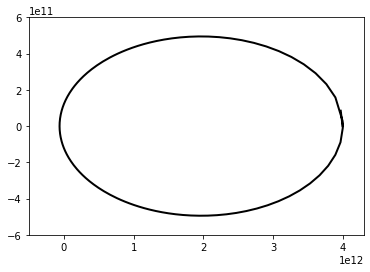

In [105]:
############## To run this you need to install ffmpeg ############## 
#Easiest way to install is to write in the Anaconda Prompt: "conda install -c conda-forge ffmpeg"

%matplotlib inline
x_data = []
y_data = []

fig, ax = plt.subplots()

ax.set_xlim(( -0.5e12, 4.3e12))
ax.set_ylim((-6e11,6e11))

line, = ax.plot([], [], lw=2, color ="black")

def init():
    line.set_data([], [])
    return (line,)

# animation function. 
def animate(i):
    x = x_points[i] 
    y = y_points[i]
    x_data.append(x)
    y_data.append(y)
    line.set_data(x_data, y_data)
    return (line,)
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(t_points), interval= 50, blit=True)
HTML(anim.to_html5_video())

On se rend immédiatement compte que les pas de temps sont beaucoup plus plus petits aux bout de l'ellipse. Toutefois, on peut ajuster l'erreur delta pour avoir une erreur moins considérable. 

## Mécanique céleste - la Terre

#### d. Calcul de l'orbite de la Terre autour du soleil

In [8]:
#Constantes
h = 1 / (365.25 * 24) # year
G = cst.G.value * ( 365.25 * 24 * 60 * 60) ** 2 #m^2/kg year^2
M = cst.M_sun.value #kg
m = cst.M_earth.value #kg

In [9]:
#Fonction dépendante de r selon l'équation 9 décrivant le mouvement
def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    R = sqrt(x ** 2 + y ** 2)
    return np.array([ vx, -G * M * x / R ** 3, vy, -G * M * y / R ** 3 ])


In [10]:
#Méthode de Verlet pour rajouter la dépendance temporelle

def orbite(t_0,t_f,x0,y0,vx0,vy0):
    xn = []
    yn = []
    tn = np.arange(t_0, t_f, h) #liste de temps entre t_0 et T_f avec un pas h
    r = np.array([x0, vx0, y0, vy0])
    #Premier pas
    demi = 0.5 * h * f(r) 
    vxn = r[1] + demi[1] #vx(t+h/2)
    vyn = r[3] + demi[3] #vy(t+h/2)
    for t in tn: #Calcul pour tous les temps
        xn.append(r[0])
        yn.append(r[2])
        r[0] += h * vxn
        r[2] += h * vyn
        k = h * f(r)
        r[1] = vxn+ 0.5 * k[1]
        r[3] = vyn + 0.5 * k[3]
        demi = 0.5 * h * f(r)
        vxn += k[1]
        vyn+= k[3]
    return xn,yn #Valeurs de positions en x et y pour tous les temps 

In [11]:
# Valeurs initiales 

p = 1.4710 * 10 ** 11 #m
vt = 3.0287 * 10 ** 4 * 365.25 * 24 * 60 * 60 #m/an
theta = np.array([np.pi/4,np.pi/3,np.pi/2]) # On a choisi quelques valeurs d'angles pour varier la position initiale
x0 = p*np.cos(theta) #Position initiale x
y0 = p*np.sin(theta) #Position initiale y
vx0 = vt*np.cos(np.pi/2+theta) #Vitesse initiale x
vy0 = vt*np.sin(np.pi/2+theta) #Vitesse initiale y

# 5 orbites à des positions initiales différentes 
x1,y1 = orbite(0,2,p,0,0,vt)
x2,y2 = orbite(0,2,x0[0],y0[0],vx0[0],vy0[0])
x3,y3 = orbite(0,2,x0[1],y0[1],vx0[1],vy0[1])
x4,y4 = orbite(0,2,x0[2],y0[2],vx0[2],vy0[2])
x5,y5 = orbite(0,2,0,p,vt,0)

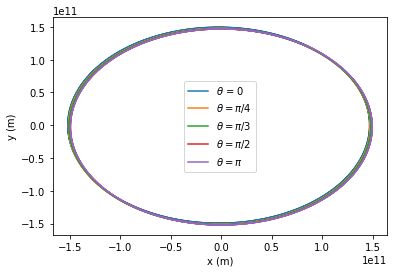

In [12]:
# Plot orbites
plt.plot(x1,y1,label = '$\\theta$ = 0')
plt.plot(x2,y2,label = '$\\theta = \pi/4$')
plt.plot(x3,y3,label = '$\\theta = \pi/3$')
plt.plot(x4,y4,label = '$\\theta = \pi/2$')
plt.plot(x5,y5,label = '$\\theta = \pi$')

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

#### e. Énergie potentielle et cinétique. 

In [34]:
# On reprend la même fonction que en d. 
def orbite(t_0,t_f,x0,y0,vx0,vy0):
    xn = []
    yn = []
    U = []
    K= []
    tn = np.arange(t_0, t_f, h) #liste de temps entre t_0 et T_f avec un pas h
    r = np.array([x0, vx0, y0, vy0])
    #Premier pas
    demi = 0.5 * h * f(r) 
    vxn = r[1] + demi[1] #vx(t+h/2)
    vyn = r[3] + demi[3] #vy(t+h/2)
    for t in tn: #Calcul pour tous les temps
        xn.append(r[0])
        yn.append(r[2])
        r[0] += h * vxn
        r[2] += h * vyn
        k = h * f(r)
        r[1] = vxn+ 0.5 * k[1]
        r[3] = vyn + 0.5 * k[3]
        demi = 0.5 * h * f(r)
        vxn += k[1]
        vyn+= k[3]
        #Calcul des énergies
        U.append(-cst.G.value * M * m / sqrt(r[0] ** 2 + r[2] ** 2))
        K.append(0.5 * m * (r[1] ** 2 + r[3] ** 2) / (365.25 * 24 * 60 * 60) ** 2)
    E = np.array(K) + np.array(U)
    return xn,yn,K,U,E,tn #Valeurs d'énergies cinétiques et potentiels  


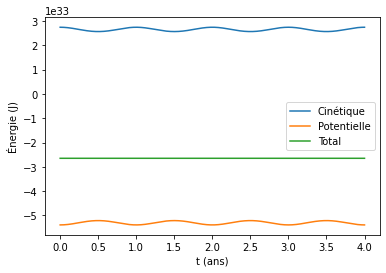

In [35]:
x1,y1,k1,u1,E1,t1 = orbite(0,4,p,0,0,vt)

plt.plot(t1, k1,label = "Cinétique")
plt.plot(t1, u1,label = "Potentielle")
plt.plot(t1, E1,label = "Totale")
plt.xlabel('t (ans)')
plt.ylabel('Énergie (J)')
plt.legend()
plt.show()

#### f. RK2 pour calcul de l'orbite

## Mécanique céleste - Mars